# qSMLM
a tool for modeling single molecule localization microscopy blinking kinetics

## fraction-Estimator
estimate the composition of oligomeric states from single molecule blinking statistics

by

Sebastian Malkusch

2018-06-29

single molecule biophysics,
Goethe-University Frankfurt, Germany

malkusch@chemie.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

### Create Modelling System

In [1]:
from qSMLM.jupyter import qsmlmFractionEstimatorWidgets
from qSMLM.modelAnalysis import qsmlmFractionEstimator
widgets = qsmlmFractionEstimatorWidgets.QsmlmFractionEstimatorWidgets()
modeller = qsmlmFractionEstimator.QsmlmFractionEstimator()

qsmlmWidgets initialized
qsmlmPEstimator initialized
qsmlmModel initialized
qsmlmData initialized


### Define qSMLM Blinking Statistic Data Set
Set the path to your data location. Define the columns to be loaded. n := blinking events p0 := number of positive events. The data must comprise monomeric oligomers only. The histogram needs to exist of absolute event numbers (integer). Normalization is done by qSMLM.

In [2]:
display(widgets.pathText, widgets.pathButton, widgets.nText, widgets.p0Text)

Text(value='', description='path to file', placeholder='enter a string', style=DescriptionStyle(description_wi…

Button(description='browse', icon='check', style=ButtonStyle(), tooltip='Click me')

BoundedIntText(value=0, description='n', style=DescriptionStyle(description_width='initial'))

BoundedIntText(value=1, description='p0', style=DescriptionStyle(description_width='initial'))

### Set Initial Parameters
Set parameter values for the blinking model.
The detection efficiency (d) needs to be determined within a former analysis using "qSMLM-d-Estimator"
The blinking rate (p) needs to be determined within a former analysis using "qSMLM-p-Estimator"
Giva a vector of populated states (m).
Give an initial guess for the state populations (initWeigth).

In [3]:
display(widgets.dText, widgets.pText, widgets.mVectorText, widgets.mVectorValidity, widgets.weightVectorText, widgets.weightVectorValidity)

BoundedFloatText(value=0.3, description='d', max=1.0, step=0.001, style=DescriptionStyle(description_width='in…

BoundedFloatText(value=0.3, description='p', max=1.0, step=0.001, style=DescriptionStyle(description_width='in…

Text(value='', description='m vector', placeholder='0, 1, 2', style=DescriptionStyle(description_width='initia…

Valid(value=False, description='m vector validity:', style=DescriptionStyle(description_width='initial'))

Text(value='', description='weight vector', placeholder='0.3, 0.3, 0.3', style=DescriptionStyle(description_wi…

Valid(value=False, description='weight vector validity:', style=DescriptionStyle(description_width='initial'))

### Select Parameter Estimator
Choose between a least squares or maximum likelihood based routine.

In [4]:
display(widgets.optimizerSelector)

Select(description='optimizer', options=('least squares', 'maximum likelihood'), rows=1, value='least squares'…

### Data Modeling


loaded data from: /Users/malkusch/Documents/Biophysik/qSMLM/modi/ssp_at_2019-01-15_15-27-45_histogram.txt

Initialized model parameters:


number of measurements: 8722.0


number of states: 2


state vector:
[0, 1]


apparent weight vector:
[0.44247787610619466, 0.5575221238938053]


corrected weight vector:
[0.5 0.5]


d: 0.74


p: 0.198




Optimized model parameters:


number of measurements: 8722.0


number of states: 2


state vector:
[0, 1]


apparent weight vector:
[0.31427455 0.68572545]


corrected weight vector:
[0.36607356 0.63392644]


d: 0.74


p: 0.198




Optimized model statistics:
number of observations:	8722
number of estimated parameters:	2
LogL:	252.22569035
BIC:	-486.30417300
AIC:	-500.45138070
AICc:	-500.45000440


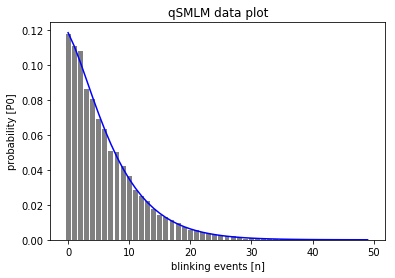

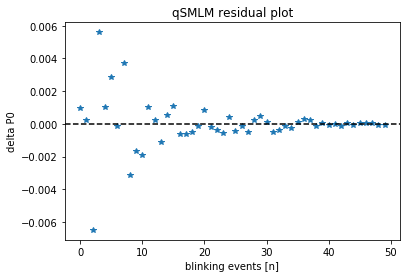

In [7]:
display(widgets.analysisButton)
def runAnalysis(event):
    widgets.clearOutput()
    if widgets.fileName:
        modeller.runAnalysis(n=widgets.nText.value,
                             p0=widgets.p0Text.value,
                             d = widgets.dText.value,
                             p = widgets.pText.value,
                             mV=widgets.mVector,
                             wV=widgets.weightVector,
                             opt=widgets.optimizerSelector.value,
                             fileName = widgets.fileName)

widgets.analysisButton.on_click(runAnalysis)

### Save Model
Save results of modelig routine

In [8]:
display(widgets.saveButton)
def saveAnalysis(event):
    widgets.clearOutput()
    if widgets.fileName:
        modeller.saveResults()

widgets.saveButton.on_click(saveAnalysis)


Modeling statistics written to 2019-01-15-ssp_at_2019-01-15_15-27-45_histogram_fraction-estimation_mle_model.txt

LS-based modeling results written to 2019-01-15-ssp_at_2019-01-15_15-27-45_histogram_fraction-estimation_mle_fit.txt


### Quote
"Blinking is, what we call, the reappearance of fluorscence.", Franziska Fricke